# Homework 3: Hunt Shifting Numbers

### Import TensorFlow

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

<class 'ModuleNotFoundError'>: No module named 'tensorflow'

## Task 1

### The MNIST dataset


The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

source: https://www.tensorflow.org/tutorials/images/cnn

### Load the MNIST Dataset

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train /= 255
x_test /= 255

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of your model:

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

### Compile and train the model

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5)

Epoch 1/10

1563/1563 [==============================] - 8s 4ms/step - loss: 1.4971 - accuracy: 0.4553 - val_loss: 1.2659 - val_accuracy: 0.5492
Epoch 2/10

1563/1563 [==============================] - 6s 4ms/step - loss: 1.1424 - accuracy: 0.5966 - val_loss: 1.1025 - val_accuracy: 0.6098
Epoch 3/10

1563/1563 [==============================] - 6s 4ms/step - loss: 0.9885 - accuracy: 0.6539 - val_loss: 0.9557 - val_accuracy: 0.6629
Epoch 4/10

1563/1563 [==============================] - 6s 4ms/step - loss: 0.8932 - accuracy: 0.6878 - val_loss: 0.8924 - val_accuracy: 0.6935
Epoch 5/10

1563/1563 [==============================] - 6s 4ms/step - loss: 0.8222 - accuracy: 0.7130 - val_loss: 0.8679 - val_accuracy: 0.7025
Epoch 6/10

1563/1563 [==============================] - 6s 4ms/step - loss: 0.7663 - accuracy: 0.7323 - val_loss: 0.9336 - val_accuracy: 0.6819
Epoch 7/10

1563/1563 [==============================] - 6s 4ms/step - loss: 0.7224 - accuracy: 0.7466 - val_loss: 0.8546 - val_ac

### Evaluate the model

313/313 - 1s - loss: 0.8475 - accuracy: 0.7192 - 634ms/epoch - 2ms/step


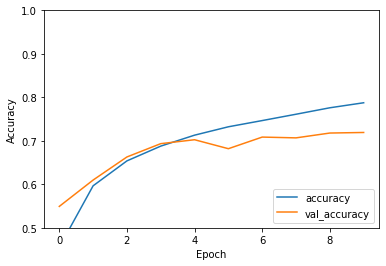

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [11]:
print(test_acc)

0.7192000150680542


Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.